# Double Pendulum Project
**Name:** Michael Blanchard and Reilly Kobbe

**Class:** PHY-2200

**Professor:** Dr. Titus

**Description:** The goal for the project is to use multiple differential equations and an ODE to code a double pendulum. After solving the math, the task was to graph the data collected and create a model of the double pendulum itself. 

In [4]:
import ode
import numpy as np
import math
import matplotlib.pyplot as plt
from vpython import *

# Double Pendulum Code
This function is where we set out independent varaibles such as the mass of the balls, the length of the rods, the momentum, and gravity. These variables are initialized globally to stay consistent throughout the code. 

Secondly, within the function we define dtheta/dt and domega/dt for both pendulums. This is where the differential equations really came into play. Finding these equations and entering them in was difficult at first, but essentially we found we did not need to solve them, just implement them. 

Additionally, something that was confusing was where teh values of the variables "omega", "theta", "omega2", and "theta2" were initalized. Dr. Titus explained these came from the dep[] array, which did the solving for us. 

Finally, we stored these dependent varaibles into an array. This array will be used throughout the code.

Overall, we found this step to be difficult becuase of the long differential equations. However, once we realized how to implement them and understand what they were being used for, it was not so bad.

In [5]:
#independent variablesg = 10 #N/kg
R = 1  #m
m1 = .1 #mass of penn 1
m2 = .1 #mass of penn 2
L1 = .8
L2 = .8
g = 10
    
def pendulum(dep, t):  
    theta = dep[0]
    omega = dep[1]
    theta2 = dep[2]
    omega2 = dep[3] 
    
    #dtheta / dt
    dtheta = omega
    #domega/ dt
    domega = (-g*(2*m1+m2)*np.sin(theta) - m2*g*np.sin(theta-2*theta2) - 2*np.sin(theta-theta2)*m2*((omega2**2)*L2 + (omega2**2)*L1*np.cos(theta-theta2))) / (L1*((2*m1+m2)-(m2*cos(2*np.cos(2*theta-2*theta2))))) #domega/dt
    
    #dtheta2 / dt
    dtheta2 = omega2
    #domega2 / dt
    domega2 = (2*np.sin(theta-theta2) * (omega*L1*(m1+m2) + g*(m1+m2)*np.cos(theta) + (omega2**2)*L2*m2*np.cos(theta-theta2))) / (L2*((2*m1+m2)-(m2*np.cos(2*np.cos(2*theta-2*theta2))))) #equation for theta2 
    
    #array of dependent variables
    deriv = np.array([dtheta, domega, dtheta2, domega2])
    
    #This returns the value of the diff eq (i.e second deriv of theta 1 theta2)
    return deriv

# The Implementation
Moving on from the doublePendulum funciton we have the implentation of the equations. Additionally, we make use of RK4.

We start by declaring some dependent variables and storing them into another array. These variables will be parameters when RK4 is used. 

Next, we declare then initialize 4 arrays; two for theta(2), two for omega(2), and one for time. These arrays are used for when we plot our results on a graph and model our double pendulum. 

Finally, we have our for loop. This is where RK4 is used and everything is caluclated. When the ODE is called, we pass in the return value of pendulum, our data array, time (t), and our timestep (h). This is all then stored in the data array. On top of this time is always being updated becuase this is in real time. The thetas and omegas are also stored in their specific array. Again, this is so we can plott and model our data.

In conclusion we found this section of code to be the easiest. Most of the new information was essentially duplicated from the single pendulum code. 

In [6]:
#dependent variables
theta = np.pi/2
omega = 0
theta2 = np.pi/2
omega2 = 0

data = np.array([theta, omega, theta2, omega2]) #initialize array to store dependent variables

#independent variable
t = 0
h = 0.01
Nsteps = int(5/h) #N steps for T seconds of evolution

#create arrays needed for plotting theta vs. t and omega vs. t
tarr = np.zeros(Nsteps)
thetaarr = np.zeros(Nsteps)
omegaarr = np.zeros(Nsteps)
theta2arr = np.zeros(Nsteps)
omega2arr = np.zeros(Nsteps)

tarr[0] = t
thetaarr[0] = theta
omegaarr[0] = omega
theta2arr[0] = theta2
omega2arr[0] = omega2

#create a time evolution loop
for n in range(1,Nsteps):
    
    data = ode.RK4(pendulum, data, t, h) #update [theta, omega]
    
    t = t + h #update values
    
    #store values in arrays
    tarr[n] = t
    
    #for the total energy
    y = -R*np.cos(data[0])
    v = R*np.cos(data[1])
    
    thetaarr[n] = data[0] #store theta
    omegaarr[n] = data[1] #store omega
    theta2arr[n] = data[2] #store theta2
    omega2arr[n] = data[3] #store omega2

# Graphing our Results
After properly making our calculations, it came time to graph our data. We created two graphs; one was both theta1 and theta2 graphed vs. time and the second was theta1 and theta2 graphed against eachother. For each graph, our theta, omega, and time arrays were used extensively. Without this information, we would not be able to properly plot our data.

Overall, plotting the graphs was very easy. All we needed was the arrays in which we stored our data in. We made sure to clearly and acuratley label our graphs. 

**Theta vs Time** 

This graph does a nice job depicting how both pendulum angles are acting while in motion. There is no point where the graph takes off into infinity, which is an error another group had. We deem the graph to be acurate becuase you can see both pendulums lines move with one another (roughly the same shape). 

**Theta 1 vs Theta 2**

This graph acuratley depicts how both pendulum angles work against one another. Again, we noticed nothing looked totally abnormal (i.e nothing was shooting to infinity or -infinity), so we deemed the second graph to be acurate as well.

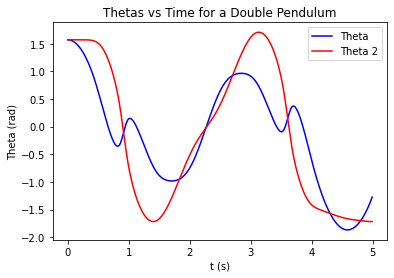

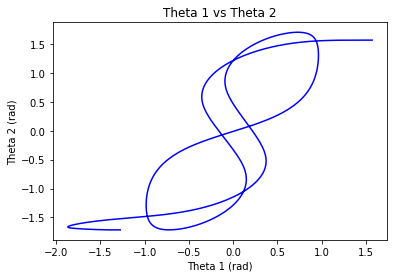

In [7]:
#Graph of Theta1 and Theta2 vs time
plt.figure()
plt.title("Thetas vs Time for a Double Pendulum")
plt.plot(tarr, thetaarr, 'b-', label='Theta')
plt.plot(tarr, theta2arr, 'r-', label='Theta 2')
plt.xlabel("t (s)")
plt.ylabel("Theta (rad)")
plt.legend()
plt.show()

plt.figure()
plt.title("Theta 1 vs Theta 2")
plt.xlabel("Theta 1 (rad)")
plt.ylabel("Theta 2 (rad)")
plt.plot(thetaarr, theta2arr, 'b-')
plt.show()

# Modeling Our Double Pendulum

In [10]:
# create the ceiling, masses, and strings
scene = canvas()

# assign 
x1 = L1 * np.sin(thetaarr[0])
y1 = -L1 * np.cos(thetaarr[0])
x2 = x1 + L2*sin(theta2arr[0])
y2 = y1 + y1-L2*cos(theta2arr[0])
    

#Ball 1
ball1 = sphere(pos=vector(x1,y1,0), radius=0.05, color=color.green , make_trail=True, retain=50) 
ball1.color=color.green

#Ball 2
ball2 = sphere(pos=vector(x2, y2,0), radius=0.05, color=color.cyan, make_trail=True, retain=50) 
ball2.color=color.cyan

#rods
rod1 = cylinder(pos=vec(0,0,0),axis=ball1.pos, color=color.white, radius=0.008)
rod2 = cylinder(pos=ball1.pos, axis=ball2.pos-ball1.pos, color=color.white, radius=0.008)

scene.pause()

for n in range(len(tarr)):
    rate(100)
    
    theta = thetaarr[n]
    theta2 = theta2arr[n]
    
    x1 = L1 * np.sin(theta)
    y1 = -L1 * np.cos(theta)
    x2 = x1 + L2*sin(theta2)
    y2 = y1 + y1-L2*cos(theta2)
    
    ball1.pos = vec(x1,y1,0)
    ball2.pos = vec(x2,y2,0)
    rod1.axis = ball1.pos
    rod2.pos = ball1.pos
    rod2.axis = ball2.pos-ball1.pos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>